# Experiment 1

The aim of this experiment is to predict the position of the skyrmions in one frame given the previous positions.

Both linear and polynomial regression will be considered to see which one models the behaviour the best.

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# import functions
import sys
sys.path.insert(0, '../')
from my_functions import *

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

## Read data

In [2]:
data = pd.read_csv('../../data/processed/trajectories.csv')
data.head()

,y,x,frame,particle
0,24.420047,61.809992,0.0,0.0
1,31.518261,109.009463,0.0,1.0
2,51.658864,41.007417,0.0,2.0
3,60.994689,82.173861,0.0,3.0
4,61.572998,129.252586,0.0,4.0


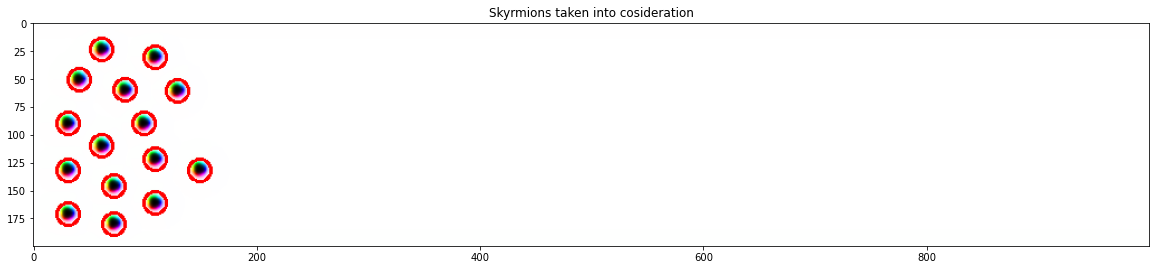

In [3]:
# show which particles we will be working on
show_tracked(data, '../../data/raw/')

In [4]:
# get list of frames, each item in the list is another list containing the x, y coordinates
# for each skyrmion in order, i.e. [x_0, y_0, x_1, y_1, ...]
frames = get_frames(data)

Getting frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:06<00:00, 123.70it/s]


In [6]:
# split data in input (a frame) and target (the next frame)
df = pd.DataFrame(columns=['frame', 'next_frame'])

for i in range(1, len(frames)):
    df = df.append({'frame': frames[i-1], 'next_frame': frames[i]}, ignore_index=True)

In [7]:
# split data in training and testing using 20% for testing
X_train, y_train, X_test, y_test = split(df, 0.2)

## Linear Regression

In [7]:
# build and fit the model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# evaluate the model
print('The model performance for X_train')
y_predict_train = evaluate(X_train, y_train, lin_model)

print('The model performance for X_test')
y_predict_test = evaluate(X_test, y_test, lin_model)

The model performance for X_train
--------------------------------------
RMSE is 3.416191282758604
R2 score is 0.9854093671582872


The model performance for X_test
--------------------------------------
RMSE is 5.964209454235747
R2 score is 0.8295229850253383




In [8]:
# prediction to dataframe for plotting
train_predict_df = get_predictions_df(y_predict_train)
test_predict_df = get_predictions_df(y_predict_test)

Prediction to dataframe: 100%|█████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:03<00:00, 48.89it/s]


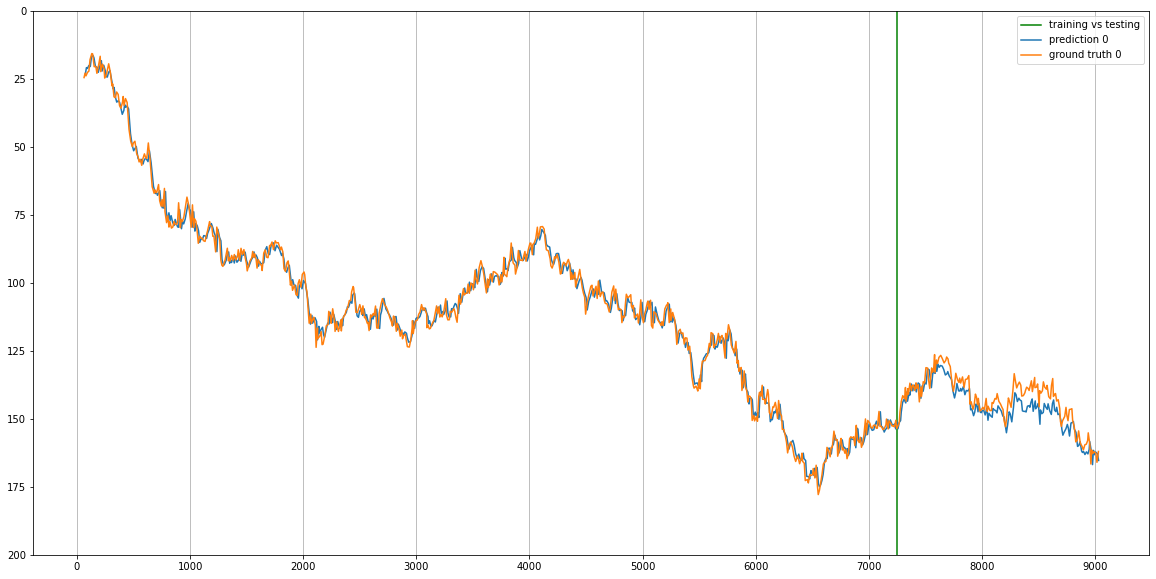

In [9]:
# plot prediction vs truth
plot_prediction(data, test_predict_df, train_predict_df, ids=[0])

## Polynomial Regression

In [10]:
# pipeline for poly regression
# StandardScaler: Standardize features by removing the mean and scaling to unit variance
# PolynomialFeatures: specify the degree of the polynomial we want to fit the data
# Ridge: use ridge regression (regularization)
pipeline = Pipeline([
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
])
pipeline.fit(X_train, y_train)

# model evaluation
print('The model performance for X_train')
y_predict_train = evaluate(X_train, y_train, pipeline)

print('The model performance for X_test')
y_predict_test = evaluate(X_test, y_test, pipeline)

The model performance for X_train
--------------------------------------
RMSE is 3.42884862795775
R2 score is 0.9893109201352979


The model performance for X_test
--------------------------------------
RMSE is 48.33749043293926
R2 score is -3.318419071428542




In [11]:
# prediction to dataframe
train_predict_df = get_predictions_df(y_predict_train)
test_predict_df = get_predictions_df(y_predict_test)

Prediction to dataframe: 100%|█████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:02<00:00, 54.38it/s]


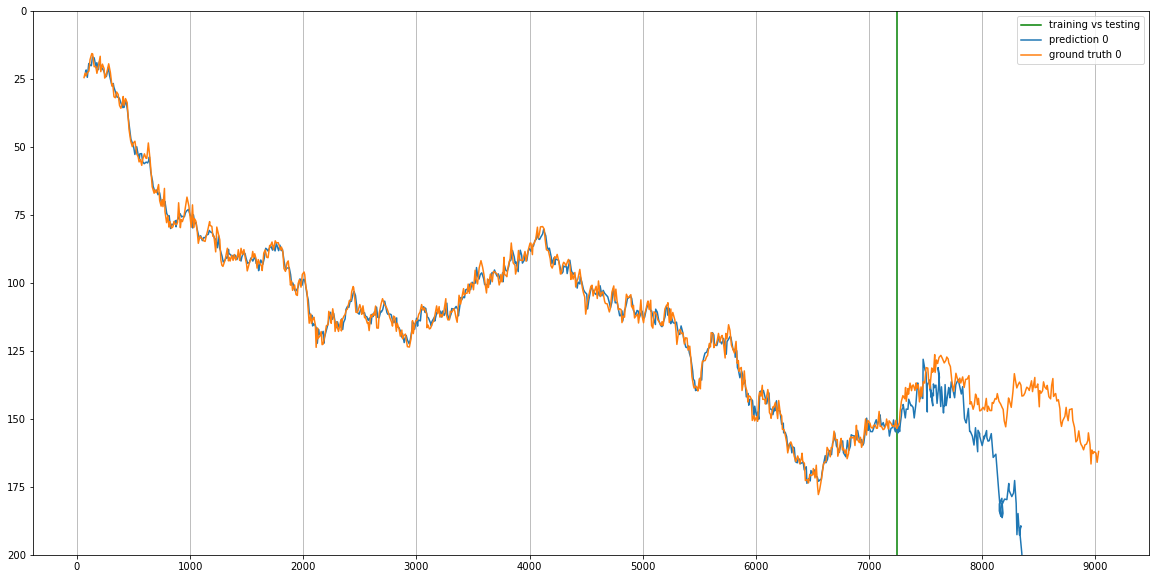

In [12]:
# plot prediction vs truth
plot_prediction(data, test_predict_df, train_predict_df, ids=[0])

## Save models

In [13]:
filename = '../../models/regression_1_linear.sav'
pickle.dump(lin_model, open(filename, 'wb'))

filename = '../../models/regression_1_poly.sav'
pickle.dump(lin_model, open(filename, 'wb'))

## Observations

This experiment gives us some insight into the relationship between one frame and the next one. In particular, we can see that there is a close-to-linear relationship. This can be further confirmed by the fact that a polynomial regression does not improve on the training set and actually performes much worse on the test set (even after regularisation).